In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flight_data_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
flight_data_df.shape

(5268, 14)

In [4]:
flight_data_df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [5]:
flight_data_df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
#Flitering by Type
flight_data_df['Type'].unique()

array(['Wright Flyer III', 'Dirigible', 'Curtiss seaplane', ...,
       'Pilatus PC-6', 'Mi-35', 'Airbus A330-203'], dtype=object)

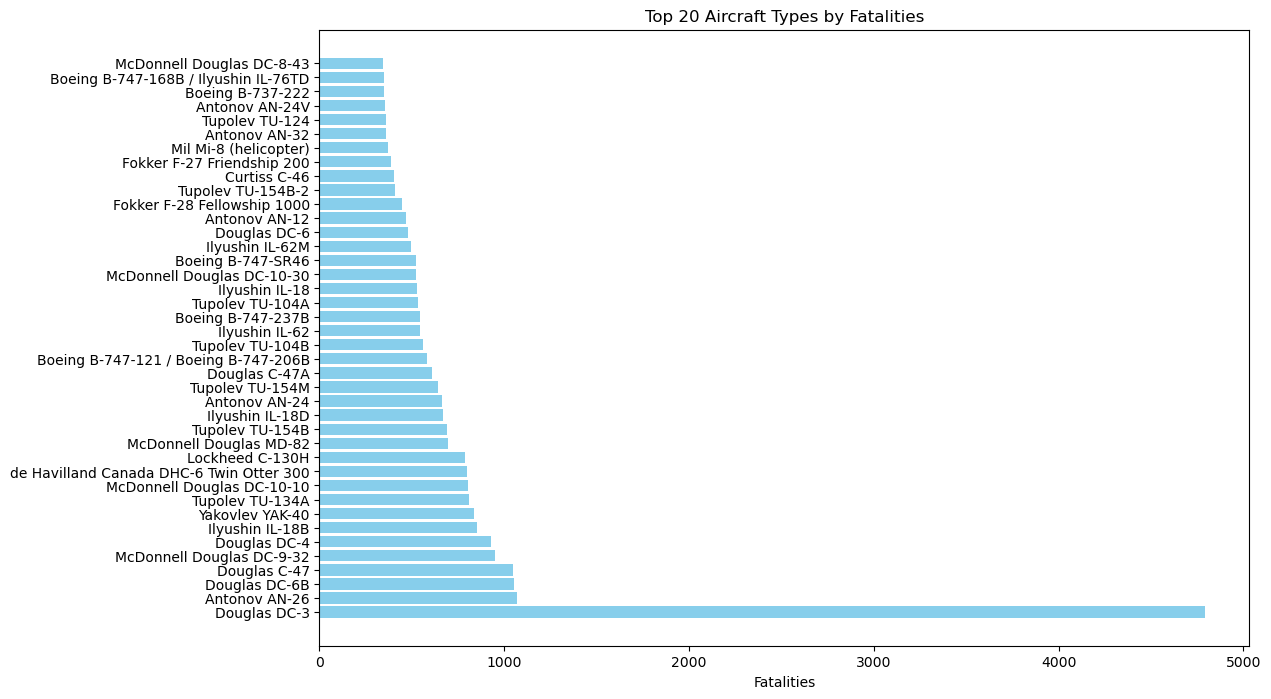

In [7]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Type')['Fatalities'].sum()
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 20 Aircraft Types by Fatalities')
plt.show()

In [8]:
flight_data_df['Operator'].unique()

array(['Military - U.S. Army', 'Military - U.S. Navy', 'Private', ...,
       'Aerotuy airline', 'Bako Air', 'Strait Air'], dtype=object)

In [9]:
# Create a new column 'Civilian/Military' based on the presence of 'military' in the 'Type' column
flight_data_df['Civilian/Military'] = flight_data_df['Operator'].apply(lambda x: 'Military' if isinstance(x, str) and 'military' in x.lower() else 'Civilian')

# Display the unique values in the new column
flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian


In [10]:
flight_data_df['Civilian/Military'].unique()

array(['Military', 'Civilian'], dtype=object)

In [11]:
civilian_df = flight_data_df.loc[(flight_data_df['Civilian/Military'] == "Civilian")]
civilian_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian
21,21,12/16/1918,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,Civilian
22,22,05/25/1919,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,Civilian
23,23,07/19/1919,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN,Civilian
24,24,10/02/1919,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN,Civilian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,04/17/2009,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile...",Civilian
5261,5261,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...,Civilian
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian


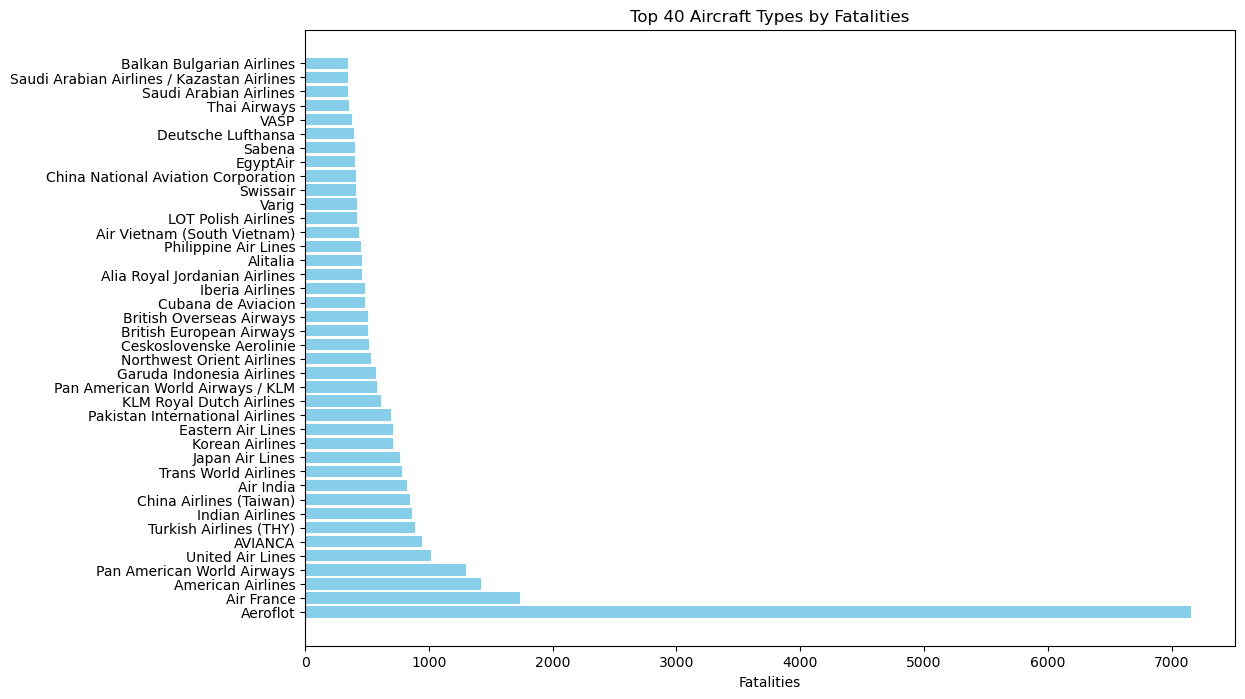

In [12]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = civilian_df.groupby('Operator')['Fatalities'].sum()
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

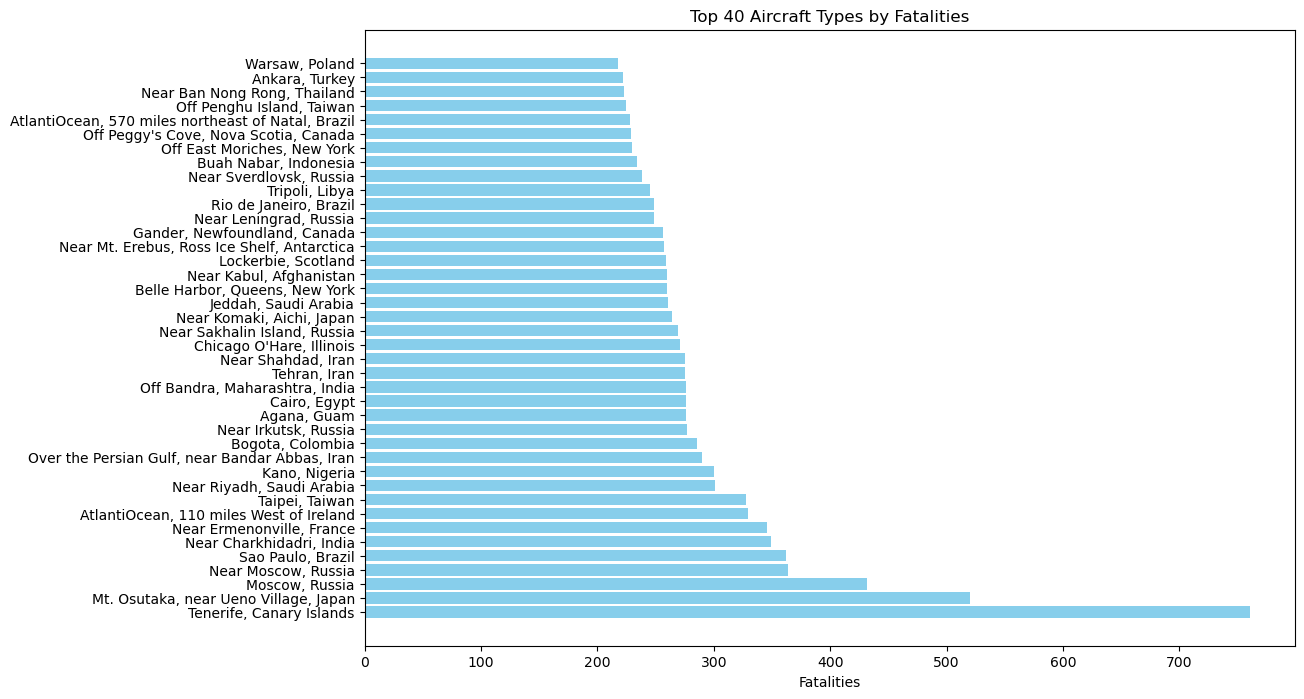

In [13]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Location').sum()['Fatalities']
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

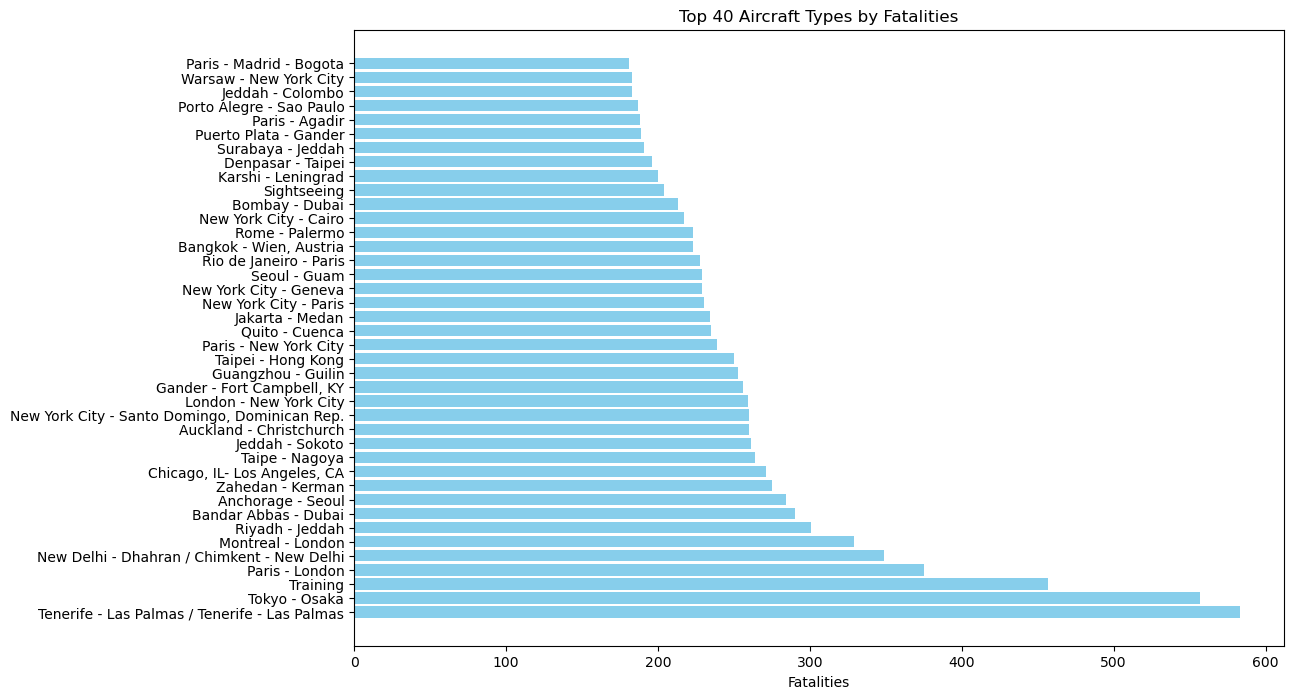

In [14]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Route').sum()['Fatalities']
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

In [15]:
# Convert the 'Time' column to datetime format
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])
# Extract the year from the 'Time' column and create a new 'Year' column
flight_data_df['Year'] = flight_data_df['Date'].dt.year

flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military,Year
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian,1913
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military,2009
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian,2009
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian,2009
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian,2009


In [16]:
import pandas as pd
import calendar

# Convert the 'Date' column to datetime format
flight_data_df['date_column'] = pd.to_datetime(flight_data_df['Date'])

# Extract the month as a number
flight_data_df['month'] = flight_data_df['date_column'].dt.month

# Map month numbers to month names
flight_data_df['month'] = flight_data_df['month'].apply(lambda x: calendar.month_name[x])

flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military,Year,date_column,month
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908,1908-09-17,September
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912,1912-07-12,July
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian,1913,1913-08-06,August
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913,1913-09-09,September
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913,1913-10-17,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military,2009,2009-05-20,May
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian,2009,2009-05-26,May
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian,2009,2009-06-01,June
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian,2009,2009-06-07,June


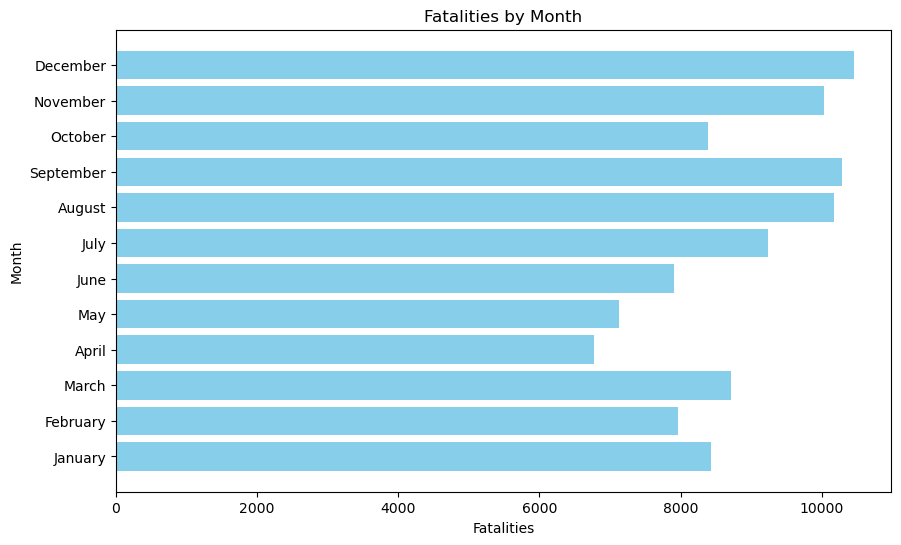

In [17]:

# Group by month and sum the fatalities
monthly_fatalities = flight_data_df.groupby('month')['Fatalities'].sum().reset_index()

# Sort by month
monthly_fatalities['month'] = pd.Categorical(monthly_fatalities['month'], categories=calendar.month_name[1:], ordered=True)
monthly_fatalities = monthly_fatalities.sort_values('month')

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(monthly_fatalities['month'], monthly_fatalities['Fatalities'], color='skyblue')
plt.xlabel('Fatalities')
plt.ylabel('Month')
plt.title('Fatalities by Month')
plt.show()

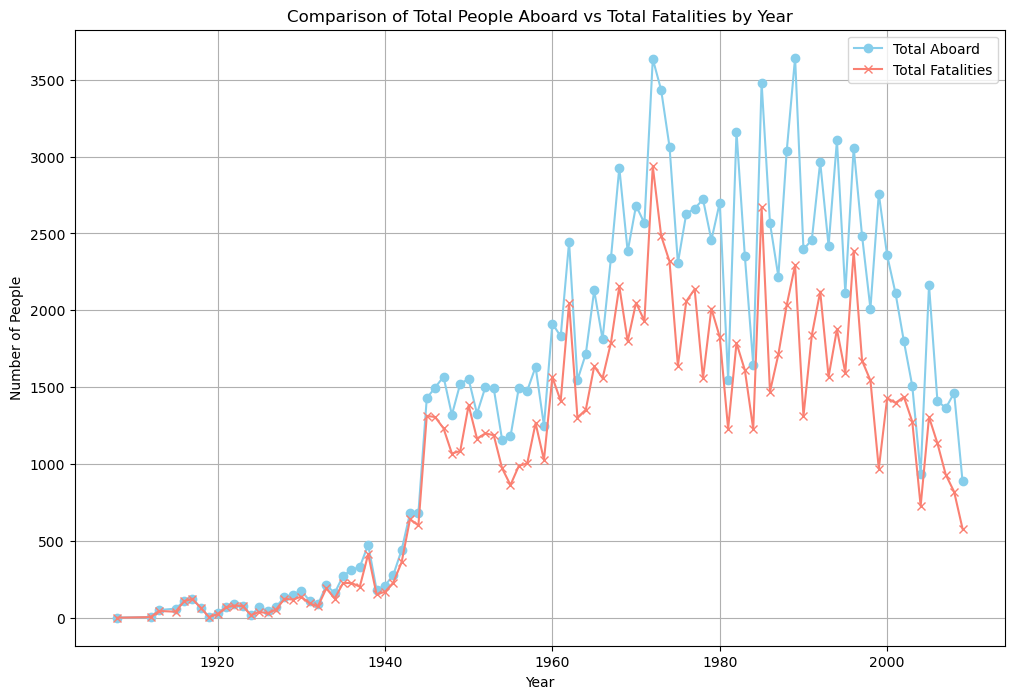

In [18]:
# Group by 'Year' and calculate total people aboard and total fatalities
grouped_data = flight_data_df.groupby('Year').agg({'Aboard': 'sum', 'Fatalities': 'sum'}).reset_index()

# Create a line chart to compare total people aboard and total fatalities based on the year
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['Year'], grouped_data['Aboard'], marker='o', label='Total Aboard', color='skyblue')
plt.plot(grouped_data['Year'], grouped_data['Fatalities'], marker='x', label='Total Fatalities', color='salmon')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Comparison of Total People Aboard vs Total Fatalities by Year')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
!pwd

/Users/kim/Kim 


In [35]:
location_df = pd.read_csv('worldcities.csv')
location_df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [37]:
merged_countries = pd.merge(flight_data_df, location_df, , how = 'outer')
merged_countries.head()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [33]:
import geopandas as gpd
# Assuming mergeWorlddfOncountryDataframe is your GeoDataFrame
# Extract centroid of each geometry
mergeWorlddfOncountryDataframe['centroid'] = mergeWorlddfOncountryDataframe.geometry.centroid
# Extract latitude and longitude from centroid
mergeWorlddfOncountryDataframe['latitude'] = mergeWorlddfOncountryDataframe.centroid.y
mergeWorlddfOncountryDataframe['longitude'] = mergeWorlddfOncountryDataframe.centroid.x
# Drop the centroid column if you don't need it anymore
mergeWorlddfOncountryDataframe.drop(columns=['centroid'], inplace=True)
# Display the DataFrame with latitude and longitude columns
print(mergeWorlddfOncountryDataframe[['name', 'latitude', 'longitude']])

                 name   latitude   longitude
0                Fiji -17.316309  163.853165
1              Canada  61.469076  -98.142381
2          Kazakhstan  48.191661   67.284611
3          Uzbekistan  41.748603   63.203640
4    Papua New Guinea  -6.451645  145.317575
..                ...        ...         ...
124             Egypt  26.506620   29.844462
125             Libya  26.997460   17.974353
126          Ethiopia   8.653999   39.551256
127          Djibouti  11.773044   42.498020
128            Uganda   1.295486   32.357550

[129 rows x 3 columns]


/var/folders/lx/071yjxh93wx_hmdwq4r88s040000gn/T/ipykernel_15918/534444268.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOncountryDataframe['centroid'] = mergeWorlddfOncountryDataframe.geometry.centroid
/var/folders/lx/071yjxh93wx_hmdwq4r88s040000gn/T/ipykernel_15918/534444268.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOncountryDataframe['latitude'] = mergeWorlddfOncountryDataframe.centroid.y
/var/folders/lx/071yjxh93wx_hmdwq4r88s040000gn/T/ipykernel_15918/534444268.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOnc

In [34]:
mergeWorlddfOncountryDataframe.head()

,pop_est,continent,name,Country_CODE,gdp_md_est,geometry,Countries,Fatalities,Years,Time,Operator,latitude,longitude
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2,28,"1986,1999","13:48,05:35","Sunflower Airlines,Air Fiji",-17.316309,163.853165
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",92,1546,"1938,1941,1941,1947,1948,1949,1950,1951,1952,1...","00:51,02:00,22:10,23:13,16:50,10:45,13:53,18:5...","Trans Canada Air Lines,Trans Canada Air Lines,...",61.469076,-98.142381
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2,10,"1987,2004","19:10,10:40","Aeroflot,Aray-Avia",48.191661,67.284611
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5,282,"1987,1985,1991,1999,2004","08:11,23:45,11:37,10:54,19:40","Aeroflot,Aeroflot,Uzbek Civil Aviation Adminis...",41.748603,63.203640
4,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6,53,"1994,1995,1996,1999,1999,2004","11:40,08:00,13:15,10:20,08:52,10:30","Southwest Air,Milne Bay Air,Milne Bay Air,Airl...",-6.451645,145.317575


In [30]:
mergeWorlddfOncountryDataframe.shape

(129, 13)

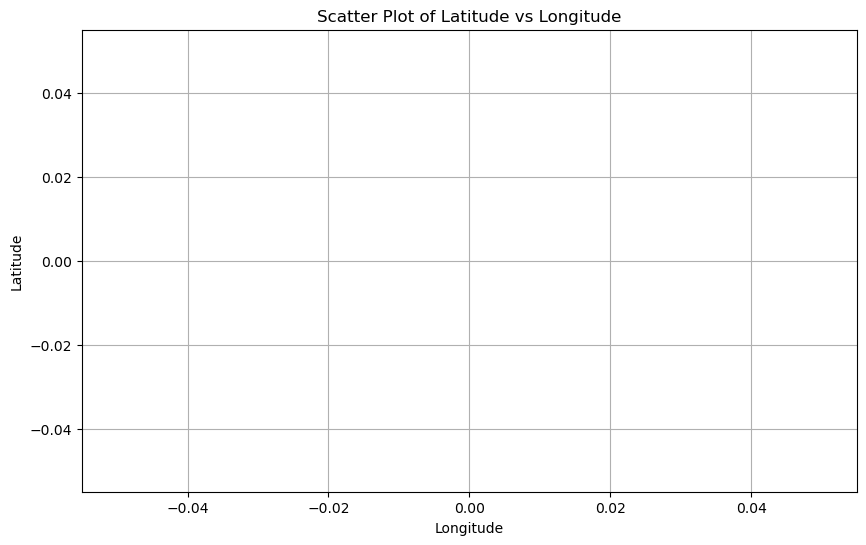

In [24]:
#Civilian fatal, type of aircrapft
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mergeWorlddfOncountryDataframe.longitude, mergeWorlddfOncountryDataframe.latitude, color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.grid(True)
plt.show()

In [ ]:
#CSV file to get the data of logitude and Latitude of countries
import folium

location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
countriesdf = mergeWorlddfOncountryDataframe.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()
worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10)
def add_markers_to_the_map(worldMap, gdf, color, icon):
    for i in range(0,len(countriesdf)):
        name = (countriesdf.name[i]).split(' ')
        continent = (countriesdf.continent[i]).split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        
        operator= countriesdf.Operator[i]
        popup_text = "Country:{}({})  Continent:{}  No.ofCrashes:{}  No.ofFacilities:{}  YearsOfCrashes:{}...  TimeOfCrashes:{}... FlightOperator:{}...".format(''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan='False', parse_html=True,  max_width='100%', lazy ='True')
        marker = folium.Marker(location=[float(countriesdf.latitude[i]),float(countriesdf.longitude[i])], popup=popup, icon = folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable= True)).add_to(worldMap)
    return worldMap
folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)

add_markers_to_the_map(worldMap, countriesdf, color = 'darkred', icon="fa-plane")
